In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
import lime
import lime.lime_tabular
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport, ROCAUC
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
data = pd.read_csv('../Source/Raw/supply_chain_train.csv')

# Load the model from a file
model = joblib.load('models/stacked_model.pkl')

# Define target and features
target = 'Attrition_Flag'
ignore_features = ['CLIENTNUM']
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numeric_features = ['Customer_Age', 'Dependent_count','Months_on_book', 'Total_Relationship_Count','Months_Inactive_12_mon', 'Contacts_Count_12_mon','Credit_Limit',
                    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt', 'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=[target]+ignore_features), 
                                                    data[target], test_size=0.3, 
                                                    random_state=42)

# Preprocessing pipeline
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features)
)

stacking_classifier = model

# Final pipeline
pipeline = make_pipeline(preprocessor, stacking_classifier)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Use the pipeline to make predictions
y_pred = pipeline.predict(X_test)

e:\Software\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



[LightGBM] [Warning] feature_fraction is set=0.8878654993500641, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8878654993500641
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=700, num_boost_round=700 will be ignored. Current value: num_iterations=700


e:\Software\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



[LightGBM] [Warning] feature_fraction is set=0.8878654993500641, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8878654993500641
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=700, num_boost_round=700 will be ignored. Current value: num_iterations=700
0:	learn: 0.5946070	total: 6.99ms	remaining: 6.57s
1:	learn: 0.5249197	total: 14.3ms	remaining: 6.74s
2:	learn: 0.4621073	total: 21.6ms	remaining: 6.74s
3:	learn: 0.4207032	total: 29ms	remaining: 6.79s
4:	learn: 0.3775305	total: 35.4ms	remaining: 6.63s
5:	learn: 0.3492238	total: 45.5ms	remaining: 7.09s
6:	learn: 0.3146395	total: 52.7ms	remaining: 7.03s
7:	learn: 0.2916936	total: 61.6ms	remaining: 7.19s
8:	learn: 0.2781944	total: 71.6ms	remaining: 7.41s
9:	learn: 0.2647639	total: 78.5ms	remaining: 7.31s
10:	learn: 0.2477524	total: 86.8ms	remaining: 7.33s
11:	learn: 0.2346884	total: 94.5ms	remaining:

e:\Software\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



[LightGBM] [Warning] feature_fraction is set=0.8878654993500641, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8878654993500641
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=700, num_boost_round=700 will be ignored. Current value: num_iterations=700
0:	learn: 0.5881762	total: 9.44ms	remaining: 8.87s
1:	learn: 0.5123651	total: 17ms	remaining: 7.97s
2:	learn: 0.4465104	total: 26.3ms	remaining: 8.22s
3:	learn: 0.3999228	total: 33.9ms	remaining: 7.93s
4:	learn: 0.3624607	total: 43.3ms	remaining: 8.11s
5:	learn: 0.3315203	total: 52ms	remaining: 8.1s
6:	learn: 0.3068961	total: 60.9ms	remaining: 8.12s
7:	learn: 0.2860739	total: 70.5ms	remaining: 8.22s
8:	learn: 0.2732576	total: 77.9ms	remaining: 8.06s
9:	learn: 0.2611121	total: 86.2ms	remaining: 8.02s
10:	learn: 0.2533791	total: 93.9ms	remaining: 7.93s
11:	learn: 0.2387646	total: 102ms	remaining: 7.8

### Yellowbrick explainer

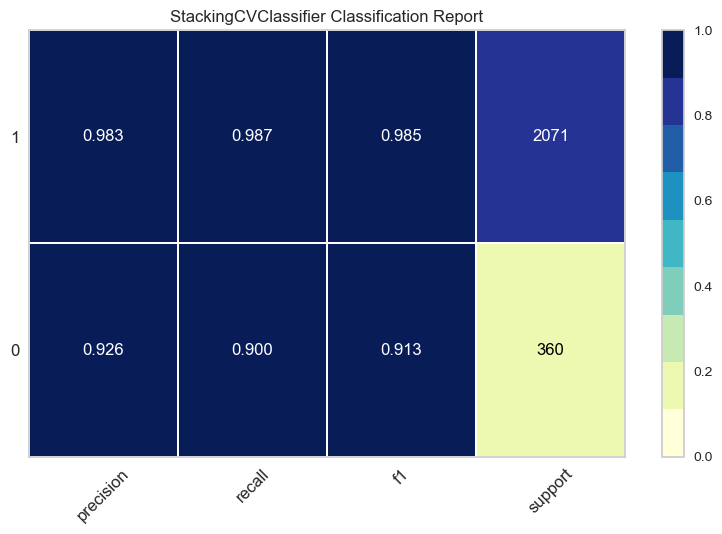

<Axes: title={'center': 'StackingCVClassifier Classification Report'}>

In [117]:
# Plot classification report
visualizer = ClassificationReport(pipeline, support=True, cmap='YlGnBu')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

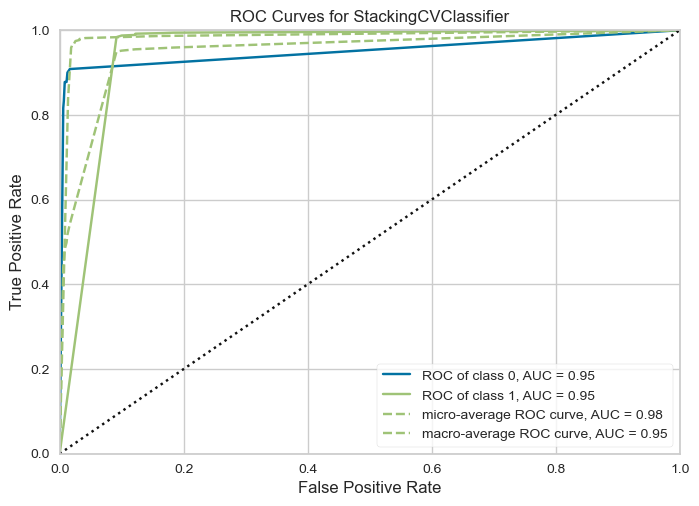

<Axes: title={'center': 'ROC Curves for StackingCVClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [118]:
visualizer2 = ROCAUC(pipeline, support=True)
visualizer2.fit(X_train, y_train)
visualizer2.score(X_val, y_val)
visualizer2.show()

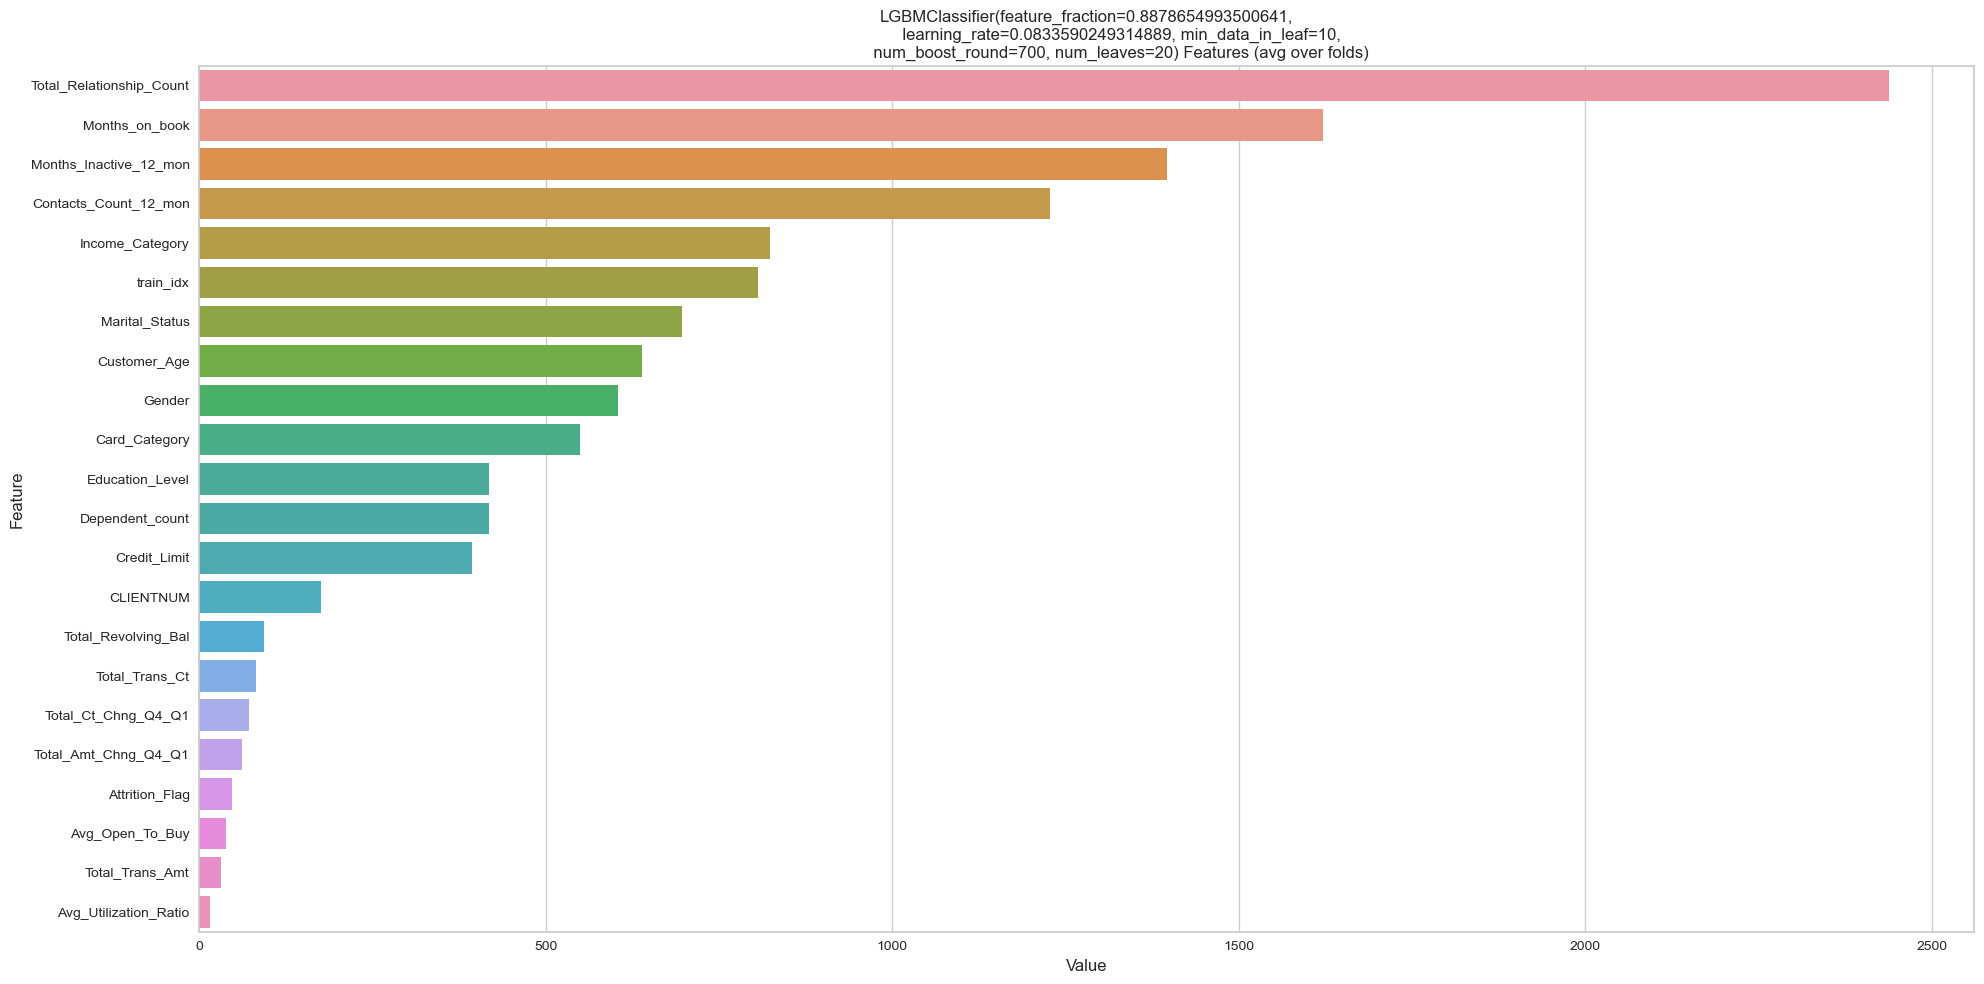

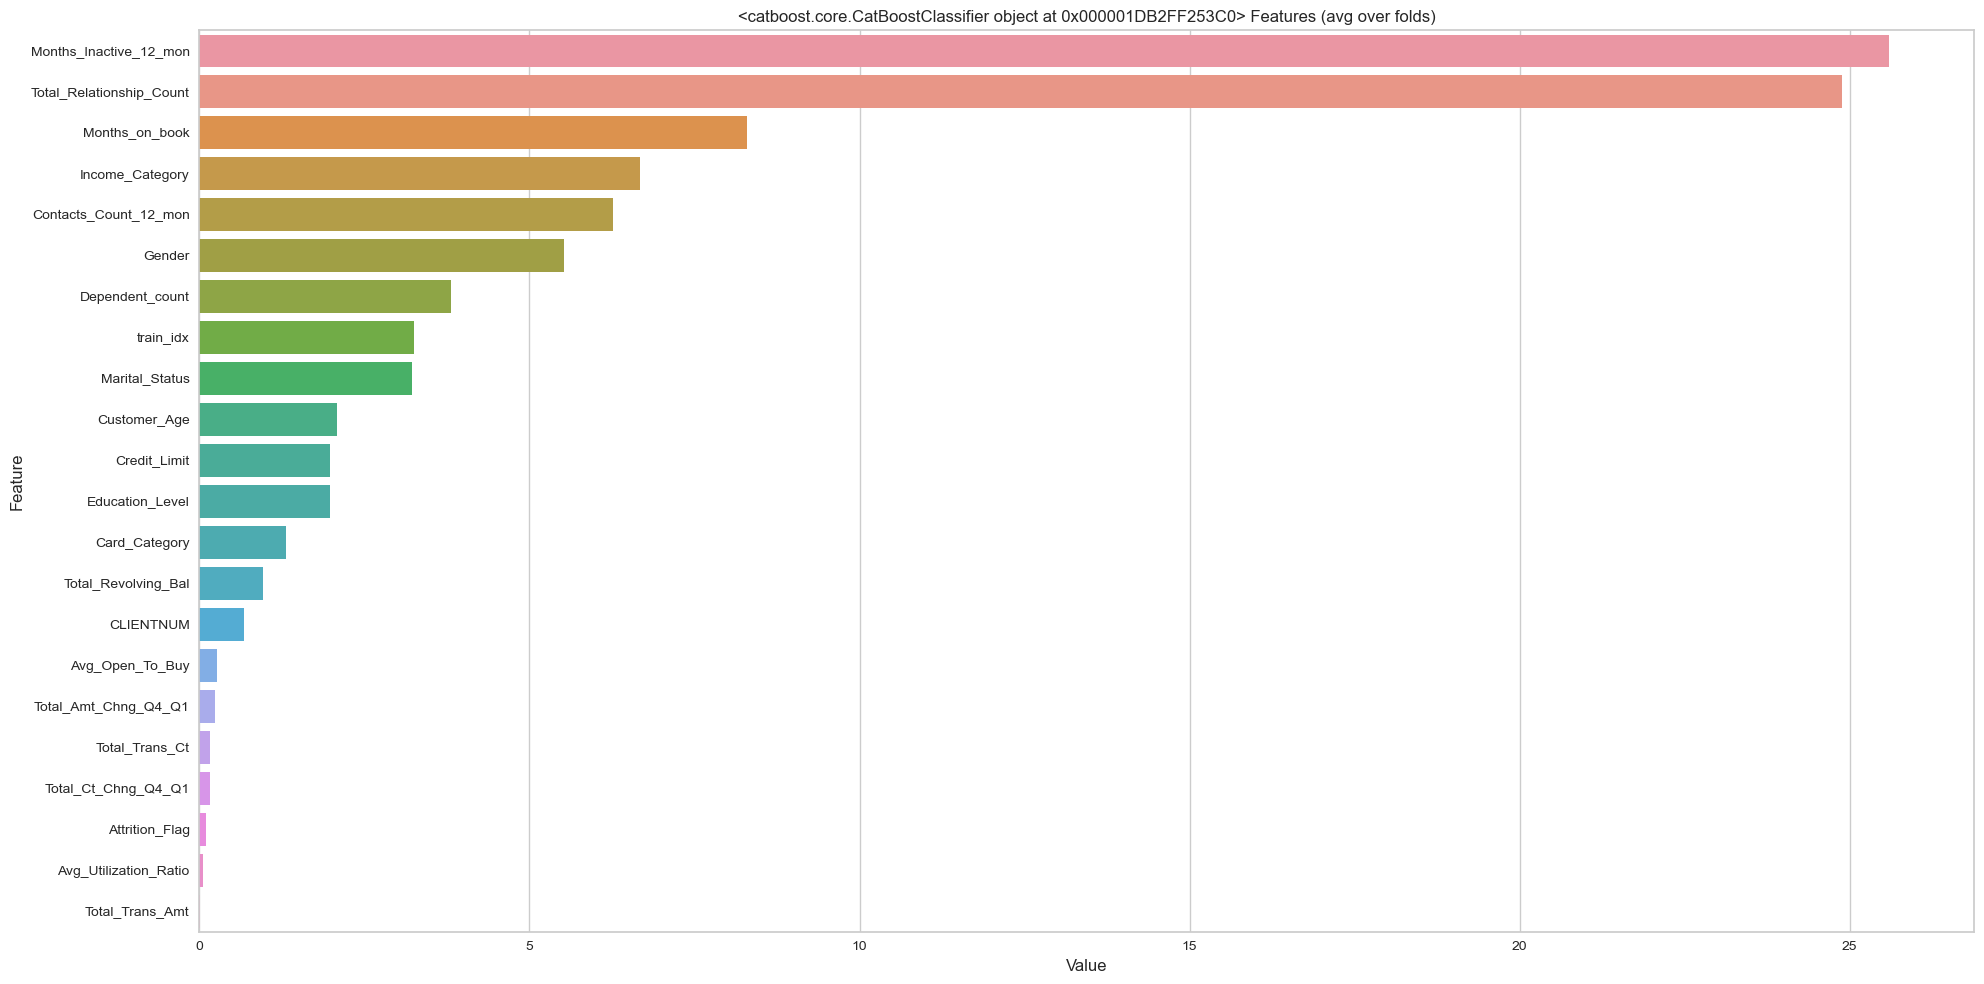

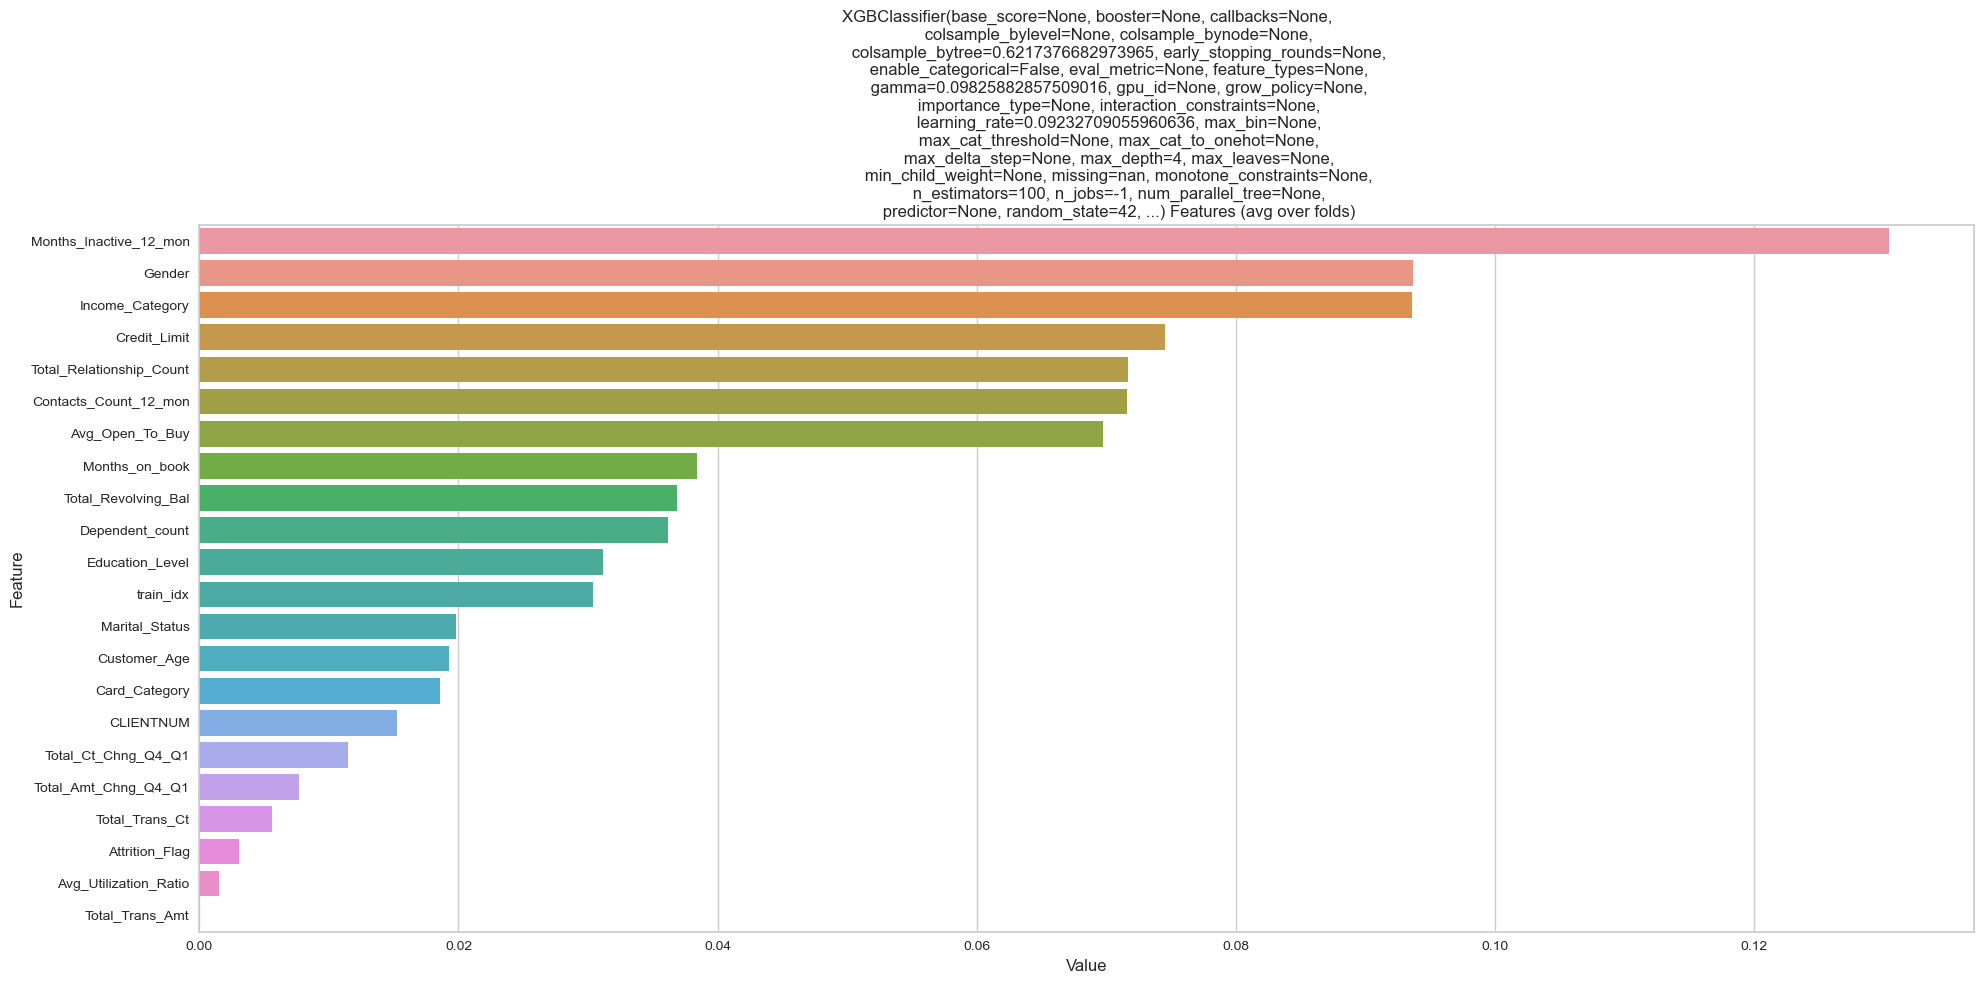

In [119]:
# Plot feature importances for each base classifier
for clf in pipeline.named_steps['stackingcvclassifier'].clfs_:
    # sorted(zip(clf.feature_importances_, X.columns), reverse=True)
    feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,data.columns)), columns=['Value','Feature'])
    plt.figure(figsize=(20, 10))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title(f'{clf} Features (avg over folds)')
    plt.tight_layout()
    plt.show()